Answer 1

Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) to form a strong learner. Each new model focuses on the errors made by the previous ones, aiming to reduce bias and variance.

Answer 2

| Feature | Boosting                           | Bagging                         |
| ------- | ---------------------------------- | ------------------------------- |
| Goal    | Reduce bias                        | Reduce variance                 |
| Learner | Sequential (each depends on prior) | Parallel (independent learners) |
| Example | AdaBoost, Gradient Boosting        | Random Forest                   |


Answer 3

AdaBoost (Adaptive Boosting) combines several weak classifiers by assigning weights to misclassified instances and focusing more on them in the next iteration. It adjusts the model to reduce errors progressively.

Answer 4

Assign equal weights to all samples.

Train a weak classifier (e.g., decision stump).

Calculate error and update sample weights — higher for misclassified points.

Repeat and combine all weak learners using weighted majority vote.

Example: Classifying spam emails by progressively correcting mistakes from previous classifiers.


Answer 5

Gradient Boosting builds models sequentially by minimizing a loss function using gradient descent. Unlike AdaBoost, it corrects residuals (errors) of previous models using gradients, not sample weights.

Answer 6

Depends on the task:

Classification: Log loss

Regression: Mean Squared Error (MSE), MAE
The loss function is minimized iteratively using gradients.

Answer 7

XGBoost (Extreme Gradient Boosting) improves by:

Regularization (L1 & L2)

Handling missing values

Parallel processing

Tree pruning

Efficient memory usage


Answer 8

| Feature              | XGBoost                  | CatBoost                                   |
| -------------------- | ------------------------ | ------------------------------------------ |
| Categorical Handling | Manual encoding required | Automatic, efficient encoding              |
| Speed                | Very fast                | Slightly slower, optimized for categorical |
| Ease                 | More manual setup        | More plug-and-play                         |


Answer 9

Fraud detection

Credit scoring

Customer churn prediction

Image and speech recognition

Ranking systems (e.g., search engines)


Answer 10

Regularization (L1 & L2) prevents overfitting by penalizing model complexity, thus encouraging simpler and more generalizable models.

Answer  11

n_estimators: Number of trees

learning_rate: Shrinks contribution of each tree

max_depth: Tree depth

subsample: Row sampling

min_samples_split, min_samples_leaf

loss: Type of loss function

Answer 12

Feature importance shows how useful a feature is in predicting the target. In trees, it's calculated by how much it reduces impurity across all splits.

Answer 13


CatBoost automatically handles categorical features using ordered boosting and target statistics without manual encoding, reducing overfitting and data leakage.






**Practical**

In [19]:
#ANswer 14

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")



Model Accuracy: 0.9649


In [ ]:
#Answer 15

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Regressor
ada_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = ada_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 43.04


Feature Importances:
worst radius               0.439565
worst perimeter            0.151439
mean concave points        0.126463
worst concave points       0.121385
worst texture              0.036671
worst area                 0.032376
mean texture               0.025562
worst concavity            0.011619
area error                 0.009215
worst smoothness           0.007131
concavity error            0.007081
compactness error          0.006757
concave points error       0.004510
texture error              0.003486
radius error               0.002265
symmetry error             0.002223
worst fractal dimension    0.001725
fractal dimension error    0.001565
mean compactness           0.001565
worst symmetry             0.001336
perimeter error            0.001170
mean area                  0.001098
mean symmetry              0.000972
worst compactness          0.000654
mean radius                0.000571
smoothness error           0.000502
mean concavity             0.000347
mean pe

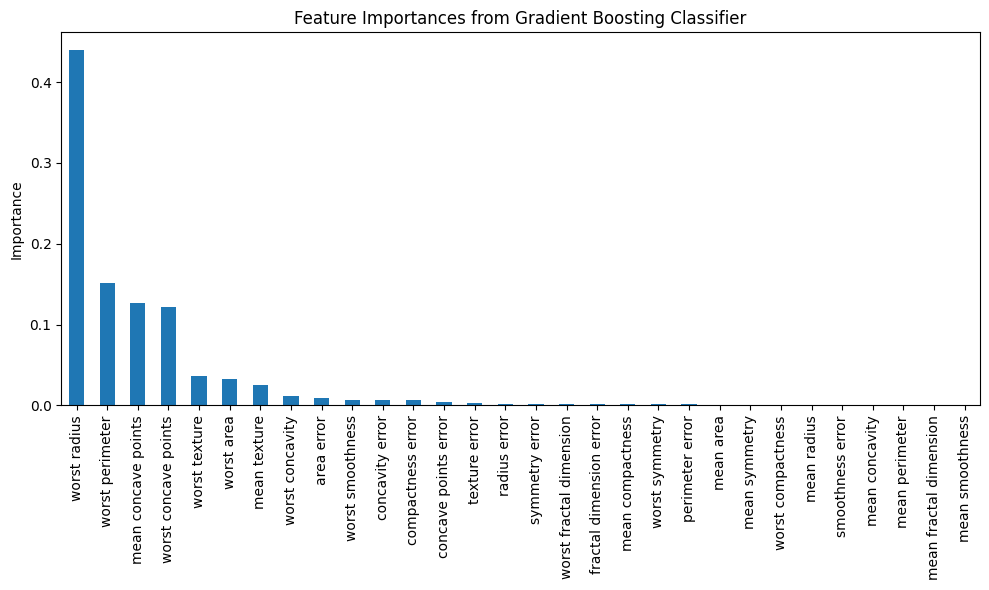

In [1]:
#answer 16

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X, y)

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [3]:
#answer 17

# Import libraries
# from sklearn.datasets import load_boston # Removed due to deprecation
from sklearn.datasets import fetch_california_housing # Use California Housing dataset instead
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Load the dataset
# boston = load_boston() # Removed due to deprecation
housing = fetch_california_housing() # Load California Housing dataset
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.7756


In [4]:
#Answer 18

# Install xgboost if not already installed
# !pip install xgboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Compare accuracies
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"XGBoost Accuracy:          {xgb_acc:.4f}")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:15:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9561
XGBoost Accuracy:          0.9561


In [6]:
#Answer 19

# Install CatBoost if not already installed
!pip install catboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0)  # verbose=0 suppresses training output
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate using F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
F1 Score: 0.9790


In [7]:
#answer 20


# Install XGBoost if not already installed
# !pip install xgboost

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.2226


Feature Importances:
worst area                 0.141202
mean concave points        0.101529
worst texture              0.083228
worst symmetry             0.078053
worst concave points       0.070182
mean texture               0.069263
compactness error          0.065799
worst smoothness           0.064893
mean symmetry              0.059225
worst concavity            0.052109
area error                 0.044659
worst perimeter            0.030982
smoothness error           0.030484
symmetry error             0.025638
mean smoothness            0.019927
radius error               0.018491
mean compactness           0.017826
mean fractal dimension     0.014490
worst compactness          0.012021
mean radius                0.000000
mean area                  0.000000
mean perimeter             0.000000
perimeter error            0.000000
texture error              0.000000
mean concavity             0.000000
concave points error       0.000000
worst radius               0.000000
fractal

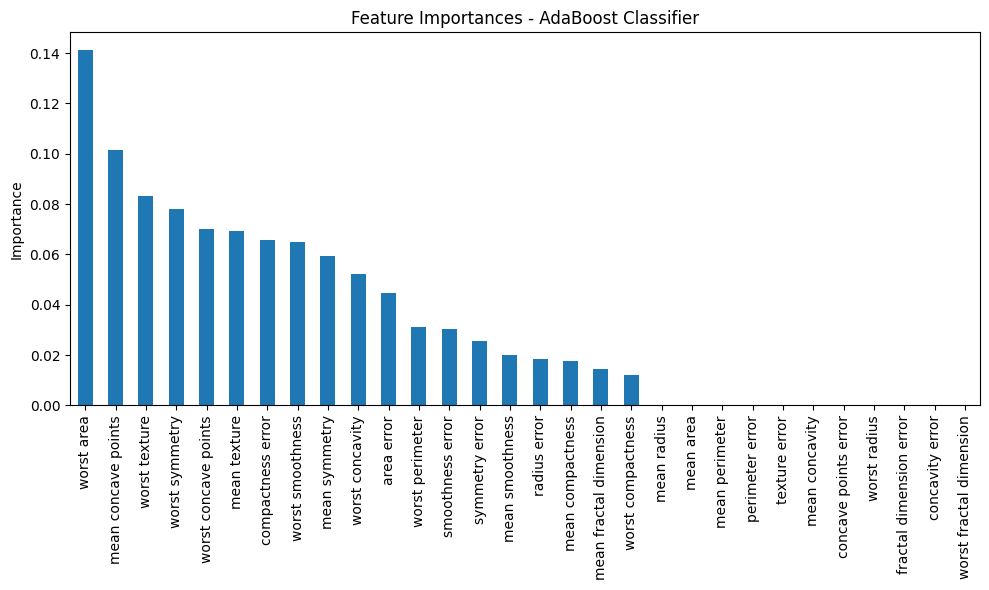

In [9]:
#Answer 21

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier with decision tree base estimator
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Print feature importances
print("Feature Importances:")
print(importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances - AdaBoost Classifier")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


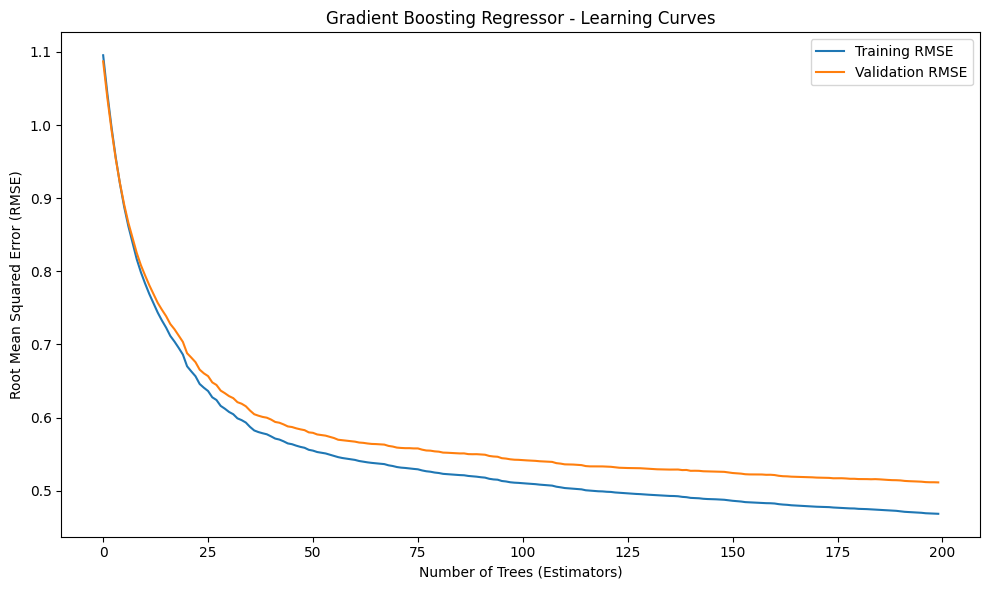

In [10]:
#Answer 22

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor with staged predictions
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Initialize lists to store errors
train_errors = []
val_errors = []

# Evaluate performance at each stage
for y_train_pred, y_val_pred in zip(model.staged_predict(X_train), model.staged_predict(X_val)):
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(train_errors), label='Training RMSE')
plt.plot(np.sqrt(val_errors), label='Validation RMSE')
plt.xlabel('Number of Trees (Estimators)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Gradient Boosting Regressor - Learning Curves')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

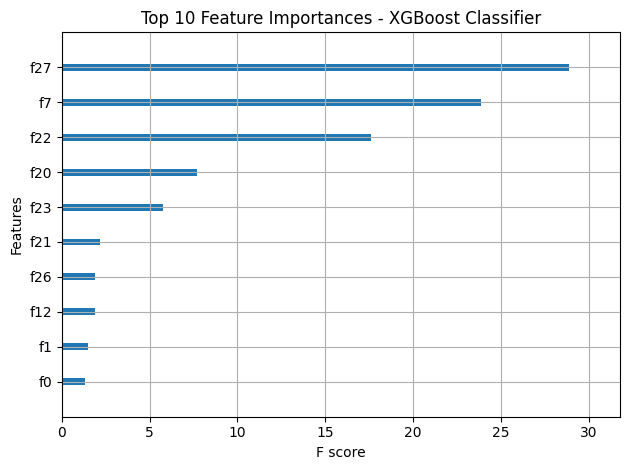

In [11]:
#Answer 23

# Install XGBoost if not already installed
# !pip install xgboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Visualize feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='gain', show_values=False)
plt.title("Top 10 Feature Importances - XGBoost Classifier")
plt.tight_layout()
plt.show()


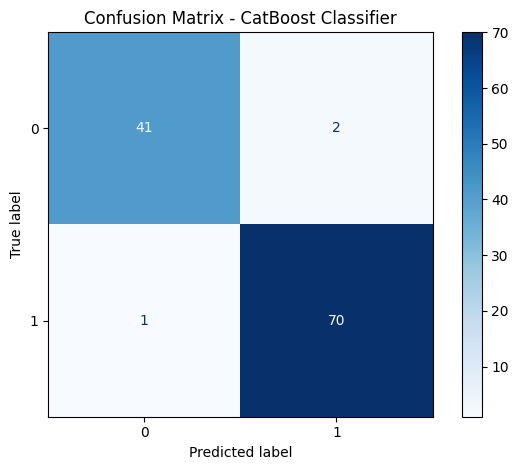

In [12]:
#Answer 24

# Install CatBoost if not already installed
# !pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.tight_layout()
plt.show()


n_estimators = 10 --> Accuracy = 0.9649
n_estimators = 50 --> Accuracy = 0.9649
n_estimators = 100 --> Accuracy = 0.9737
n_estimators = 150 --> Accuracy = 0.9737
n_estimators = 200 --> Accuracy = 0.9737


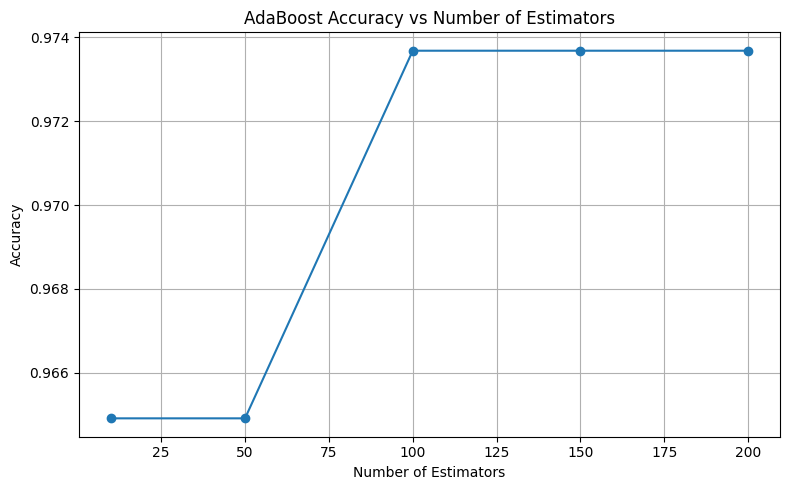

In [13]:
#Answer 25

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different estimator counts to test
n_estimators_list = [10, 50, 100, 150, 200]
accuracies = []

# Train AdaBoost Classifier with different estimators
for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n} --> Accuracy = {acc:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


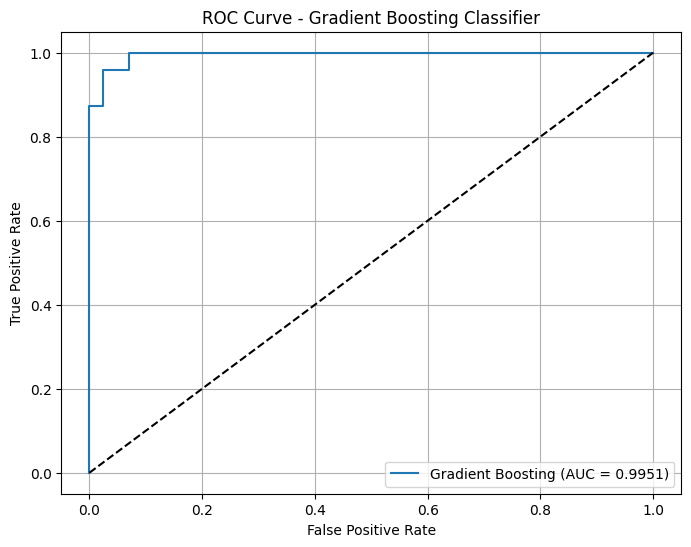

In [14]:
#Answer 26

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [15]:
#answer 27

# Install XGBoost if not installed
# !pip install xgboost

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print(f"Best learning rate: {grid_search.best_params_['learning_rate']}")

# Predict and evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse:.4f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best learning rate: 0.2
Test Mean Squared Error: 0.2160


In [16]:
#Answer 28

# Install catboost if needed
# !pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train CatBoost without class weights
model_no_weight = CatBoostClassifier(verbose=0, random_seed=42)
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)

# Step 3: Calculate class weights manually (inverse of class frequency)
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights_dict = {i : w for i, w in enumerate(class_weights)}

print("Class weights:", weights_dict)

# Step 4: Train CatBoost with class weights
model_weighted = CatBoostClassifier(class_weights=weights_dict, verbose=0, random_seed=42)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

# Step 5: Evaluate and compare
print("Without Class Weights:")
print(classification_report(y_test, y_pred_no_weight))

print("With Class Weights:")
print(classification_report(y_test, y_pred_weighted))

# F1 Scores
f1_no_weight = f1_score(y_test, y_pred_no_weight)
f1_weighted = f1_score(y_test, y_pred_weighted)
print(f"F1 Score without class weights: {f1_no_weight:.4f}")
print(f"F1 Score with class weights:    {f1_weighted:.4f}")


Class weights: {0: np.float64(0.5560189046427578), 1: np.float64(4.962779156327543)}
Without Class Weights:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       903
           1       0.82      0.62      0.71        97

    accuracy                           0.95      1000
   macro avg       0.89      0.80      0.84      1000
weighted avg       0.95      0.95      0.95      1000

With Class Weights:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       903
           1       0.71      0.80      0.75        97

    accuracy                           0.95      1000
   macro avg       0.84      0.88      0.86      1000
weighted avg       0.95      0.95      0.95      1000

F1 Score without class weights: 0.7059
F1 Score with class weights:    0.7536


Learning rate = 0.01 --> Accuracy = 0.9386
Learning rate = 0.05 --> Accuracy = 0.9561
Learning rate = 0.1 --> Accuracy = 0.9561
Learning rate = 0.2 --> Accuracy = 0.9561
Learning rate = 0.5 --> Accuracy = 0.9649
Learning rate = 1.0 --> Accuracy = 0.9649


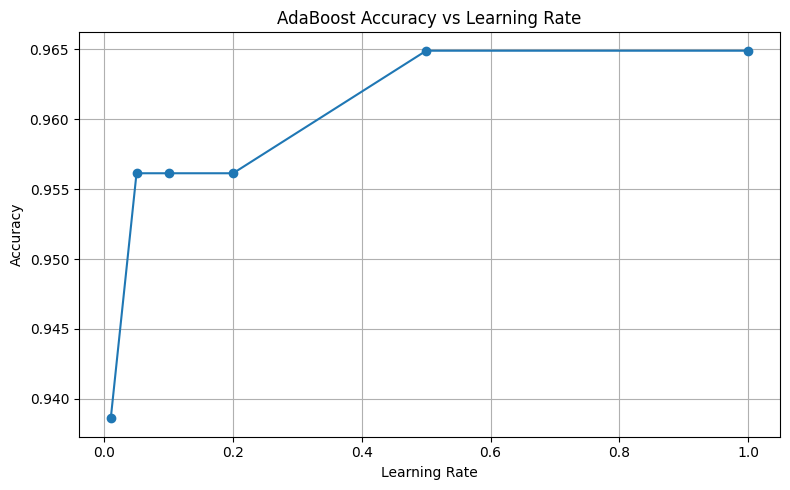

In [17]:
#Answer 29

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
accuracies = []

# Train and evaluate for each learning rate
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning rate = {lr} --> Accuracy = {acc:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#Answer 30

# !pip install xgboost

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

# Load Iris dataset (3 classes)
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier for multi-class
model = XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Predict class probabilities on test set
y_probs = model.predict_proba(X_test)

# Calculate log-loss
loss = log_loss(y_test, y_probs)
print(f"Log-loss on test set: {loss:.4f}")


Log-loss on test set: 0.0093


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:46:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
